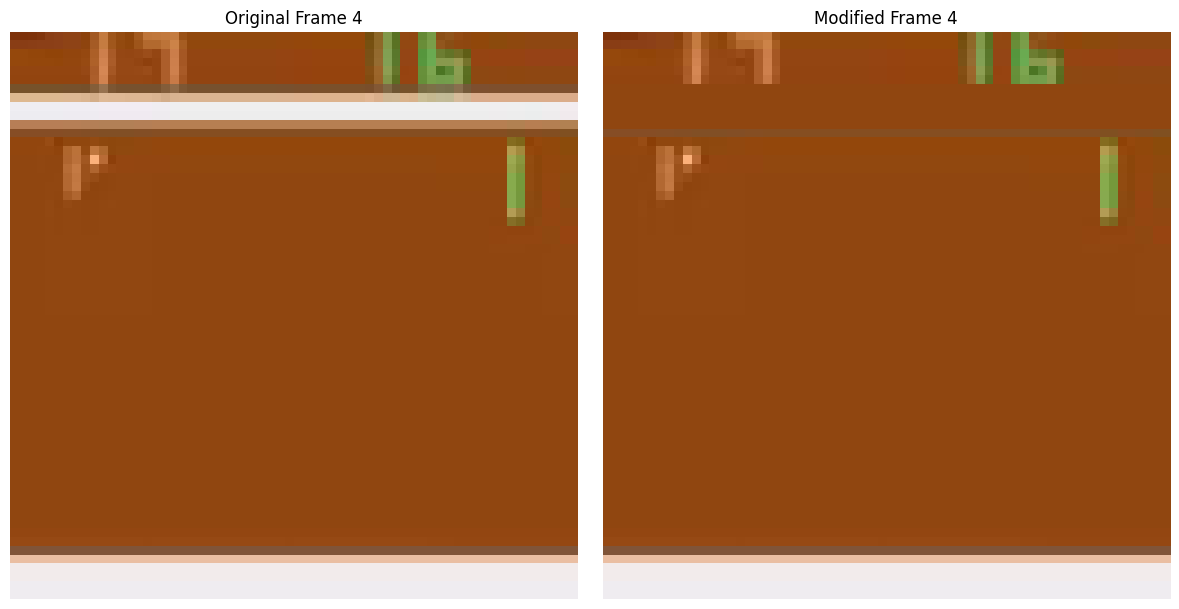

Frame 4: Set color to RGB [144, 70, 16], actual RGB: [144  70  16]


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

# 1. Define the video path and region parameters
video_path = "/scorpio/home/luyukuan/projects/dinov2/notebooks/data/pong/videos/pong.mp4"
region_x = 0
region_y = 6
region_width = 64
region_height = 6
target_color = [144, 70, 16]  # RGB color
# target_color = [255, 0, 0]  # RGB color


# Convert RGB to BGR (OpenCV uses BGR)
bgr_color = (target_color[2], target_color[1], target_color[0])

# 2. Open the video file
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print(f"Error: Could not open video file {video_path}")
else:
    # Get video properties
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    print(f"Video properties:")
    print(f"Dimensions: {frame_width}x{frame_height}")
    print(f"FPS: {fps}")
    print(f"Total frames: {total_frames}")
    
    # Display some sample frames with the region modified
    fig = plt.figure(figsize=(12, 6))
    
    frame_count = 0
    max_frames_to_display = 5  # Show first 5 frames
    
    while True:
        ret, frame = cap.read()
        if not ret:
            break
            
        # Create a copy of the frame
        modified_frame = frame.copy()
        
        # Modify the specified region with the target color
        modified_frame[region_y:region_y+region_height, region_x:region_x+region_width] = bgr_color
        
        # Convert from BGR to RGB for display
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        rgb_modified = cv2.cvtColor(modified_frame, cv2.COLOR_BGR2RGB)
        
        # Display side by side
        clear_output(wait=True)
        plt.figure(figsize=(12, 6))
        
        plt.subplot(1, 2, 1)
        plt.imshow(rgb_frame)
        plt.title(f"Original Frame {frame_count}")
        plt.axis('off')
        
        plt.subplot(1, 2, 2)
        plt.imshow(rgb_modified)
        plt.title(f"Modified Frame {frame_count}")
        plt.axis('off')
        
        plt.tight_layout()
        plt.show()
        
        # Verify the color was set correctly
        color_sample = rgb_modified[region_y, region_x]
        print(f"Frame {frame_count}: Set color to RGB {target_color}, actual RGB: {color_sample}")
        
        frame_count += 1
        if frame_count >= max_frames_to_display:
            # After max_frames_to_display frames, ask if user wants to continue
            if frame_count == max_frames_to_display:
                response = input("Continue processing more frames? (y/n): ")
                if response.lower() != 'y':
                    break
                # How many more frames to process?
                try:
                    more_frames = int(input("How many more frames? "))
                    max_frames_to_display += more_frames
                except ValueError:
                    print("Using 5 more frames")
                    max_frames_to_display += 5
            
        time.sleep(0.5)  # Brief pause between frames
    
    # Release resources
    cap.release()
    
    print("Finished processing video")

# 3. Function to process the entire video and save it (optional)
def process_and_save_video(input_path, output_path, region, color):
    """
    Process the entire video and save with modified region
    
    Parameters:
        input_path (str): Path to input video
        output_path (str): Path to output video
        region (tuple): (x, y, width, height) for the region to modify
        color (tuple): BGR color tuple
    """
    cap = cv2.VideoCapture(input_path)
    
    if not cap.isOpened():
        print(f"Error: Could not open video file {input_path}")
        return
    
    # Get video properties
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    
    # Create video writer
    fourcc = cv2.VideoWriter_fourcc(*'XVID')  # XVID codec
    out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))
    
    x, y, w, h = region
    
    frame_count = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break
            
        # Modify the specified region with the target color
        frame[y:y+h, x:x+w] = color
        
        # Write the frame
        out.write(frame)
        
        frame_count += 1
        if frame_count % 100 == 0:
            print(f"Processed {frame_count} frames")
    
    # Release resources
    cap.release()
    out.release()
    
    print(f"Video saved to {output_path}")

# Run the optional processing and saving function
# Uncomment to process and save the entire video
"""
output_path = "/scorpio/home/luyukuan/projects/dinov2/notebooks/data/pong/videos/pong_modified.avi"
process_and_save_video(
    input_path=video_path,
    output_path=output_path,
    region=(region_x, region_y, region_width, region_height),
    color=bgr_color
)
"""

# 4. Optional: Create a GIF of several modified frames
def create_gif_from_video(input_path, output_path, region, color, num_frames=10, interval=0.5):
    """
    Create a GIF of the first num_frames from the video with the region modified
    
    Parameters:
        input_path (str): Path to input video
        output_path (str): Path to output GIF
        region (tuple): (x, y, width, height) for the region to modify
        color (tuple): BGR color tuple
        num_frames (int): Number of frames to include
        interval (float): Time between frames in seconds
    """
    try:
        from PIL import Image
        
        cap = cv2.VideoCapture(input_path)
        
        if not cap.isOpened():
            print(f"Error: Could not open video file {input_path}")
            return
        
        x, y, w, h = region
        frames = []
        
        for i in range(num_frames):
            ret, frame = cap.read()
            if not ret:
                break
                
            # Modify the specified region with the target color
            frame[y:y+h, x:x+w] = color
            
            # Convert BGR to RGB
            rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            
            # Convert to PIL Image
            pil_img = Image.fromarray(rgb_frame)
            frames.append(pil_img)
        
        # Save as GIF
        if frames:
            frames[0].save(
                output_path,
                save_all=True,
                append_images=frames[1:],
                optimize=False,
                duration=int(interval * 1000),
                loop=0
            )
            print(f"GIF saved to {output_path}")
        else:
            print("No frames were processed")
        
        cap.release()
        
    except ImportError:
        print("PIL (Pillow) library is required to create GIFs")

# Uncomment to create a GIF of 10 frames
"""
gif_output_path = "/scorpio/home/luyukuan/projects/dinov2/notebooks/data/pong/videos/pong_modified.gif"
create_gif_from_video(
    input_path=video_path,
    output_path=gif_output_path,
    region=(region_x, region_y, region_width, region_height),
    color=bgr_color,
    num_frames=10,
    interval=0.2
)
"""

Frame 2 - Pixel at coordinates [13, 19]:
BGR Value: [ 16  70 144]
RGB Value: (144, 70, 16)


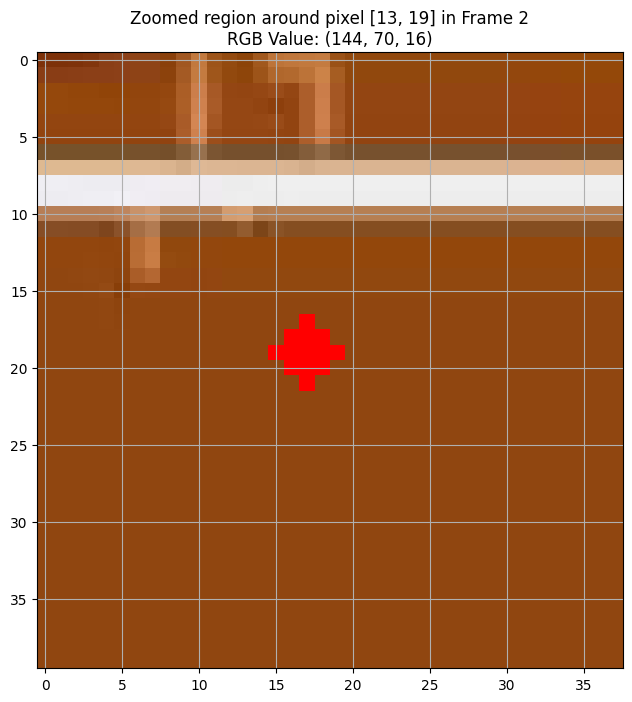

In [5]:
# Code to print the RGB value of pixel at [13, 19] of frame 2

import cv2
import numpy as np

# Define the video path
video_path = "/scorpio/home/luyukuan/projects/dinov2/notebooks/data/pong/videos/pong.mp4"

# Open the video file
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print(f"Error: Could not open video file {video_path}")
else:
    # Set position to frame 2 (index 1 since counting starts at 0)
    cap.set(cv2.CAP_PROP_POS_FRAMES, 10)
    
    # Read frame 2
    ret, frame = cap.read()
    
    if ret:
        # Get pixel value at coordinates [13, 19]
        # OpenCV uses BGR color order
        y, x = 19, 17  # Note: OpenCV coordinates are (y, x) or (row, column)
        
        bgr_value = frame[y, x]
        # Convert to RGB for reporting
        rgb_value = (bgr_value[2], bgr_value[1], bgr_value[0])
        
        print(f"Frame 2 - Pixel at coordinates [13, 19]:")
        print(f"BGR Value: {bgr_value}")
        print(f"RGB Value: {rgb_value}")
        
        # Optionally, display a zoomed region around the pixel
        zoom_size = 20
        y_start = max(0, y - zoom_size)
        y_end = min(frame.shape[0], y + zoom_size + 1)
        x_start = max(0, x - zoom_size)
        x_end = min(frame.shape[1], x + zoom_size + 1)
        
        zoomed_region = frame[y_start:y_end, x_start:x_end].copy()
        
        # Mark the specific pixel with a red dot
        rel_y = y - y_start
        rel_x = x - x_start
        
        # Draw a small red circle (or rectangle) to mark the pixel
        cv2.circle(zoomed_region, (rel_x, rel_y), 2, (0, 0, 255), -1)
        
        # Convert to RGB for display
        zoomed_rgb = cv2.cvtColor(zoomed_region, cv2.COLOR_BGR2RGB)
        
        # Display using matplotlib
        import matplotlib.pyplot as plt
        plt.figure(figsize=(8, 8))
        plt.imshow(zoomed_rgb)
        plt.title(f"Zoomed region around pixel [13, 19] in Frame 2\nRGB Value: {rgb_value}")
        plt.axis('on')
        plt.grid(True)
        plt.show()
    else:
        print("Failed to read frame 2")
    
    # Release the video capture object
    cap.release()